# 07 - 1 여러 개의 이미지를 분류하는 다층 신경망을 만든다.

다중 분류 신경망을 만들기 위해서는 소프트맥스(softmax) 함수와 크로스 엔트로프(cross - entropy) 손실 함수라는 새로운 재료를 알아야 한다.

### 다중 분류 신경망을 알아보자.

이진 분류와 다중 분류를 위한 신경망의 구조를 나타낸 그림을 비교해 보면 출력층의 개수만 다르고 나머지는 같다.

### 다중 분류의 문제점과 소프트맥스 함수를 알아보자.

 - 활성화 출력이 합이 1이 아니면 비교하기 어렵다.

**소프트맥스 함수 적용해 출력 강도를 정규화!!**

  출력층의 출력 강도를 정규화하는 소프트맥스 함수(softmax function)를 사용하면 위 문제를 쉽게 해결할 수 있다. 여기서 출력 강도를 정규화한다는 의미는 전체 출력값의 합을 1로 만든다는 의미이다.

  출력이 3개인 다중 분류 신경망에 대한 소프트맥스 함수의 정의는 다음과 같다. 출력이 늘어나는 만큼 지수 함수가 늘어난다고 생각하면 수식을 이하해기 쉽다.

  $\frac{e^{z_i}}{e^{z_1}+e^{z_2}+e^{z_3}}$

위의 수식에서 z_i는 출력층의 각 뉴런에서 계산된 선형 출력을 의미하고, e는 자연 상수를 의미한다.

그렇다면 다중 분류에는 어떤 손실 함수를 사용할까?

바로 로지틱 손실 함수의 '일반화 버전'인 크로스 엔트로피(cross entropy) 손실 함수를 사용한다.

### 크로스 엔트로피 손실 함수를 도입

크로스 엔트로피 손실 함수를 소개할 때 '로지스틱 손실 함수를 일반화 했다.'라고 한 이유는 로지스틱 손실 함수가 크로스 엔트로피 손실 함수의 이진 분류 버전이기 때문이다.

크로스 엔트로피 손실 함수와 로지스틱 손실 함수를 함께 놓고 비교해보자.

<br>
크로스 엔트로피 손실 함수

$L = - \sum{y_clog(a_c)} = -( y_1log(a_1) + y_2log(a_2) + ...+y_clog(a_c)) = -1
* log(a_{y=1})$

<br>
로지스틱 손실 함수

$L = -(ylog(a) + (1-y)log(1-a))$

a_{y=1}은 정답 클래스에 해당하는 뉴런의 활성화 출력을 말한다. 크로스 엔트로피 손실 함수와 로지스틱 손실 함수 사이에는 어떤 관계가 있길래 '크로스 엔트로피 손실 함수는 로지스틱 손실 함수의 일반화 버전'이라고 했을까?

**로지스틱 손실 함수와 크로스 엔트로피 손실 함수는 매우 비슷하다.**


### 크로스 엔트로피 손실 함수를 미분하자.


**z_1에 대하여 미분**

$\frac{∂L}{∂z_1} = \frac{∂L}{∂a_1}\frac{∂a_1}{∂z_1} + \frac{∂L}{∂a_2}\frac{∂a_2}{∂z_1} + \frac{∂L}{∂a_3}\frac{∂a_3}{∂z_1}$

벡터 **z**에 대해 정리하면 크로스 엔트로피 손실 함수의 미분 결과는 다음과 같다.

$\frac{∂L}{∂z} = -(y-a)  $

로지스틱 손실 함수의 미분과 정확히 일치한다. 따라서 크로스 엔트로피 손실 함수를 역전파에 사용하기 위해 코드로 따로 구현할 필요가 없다.

### 다중 분류 신경망을 구현

이제 MinibatchNetwork 클래스를 확장하여 다중 분류를 수행할 수 있는 MultiClassNetwork 클래스를 구현해보자.

1. 소프트맥스 함수 추가하기

In [1]:
def sigmoid(self, z):
  z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
  a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
  return a

def softmax(self, z):
  z = clip(z, -100, None)    # 안전한 np.exp() 계산을 위해
  exp_z = np.exp(z)
  return exp_z / np.sum(exp_z, axis=1).reshape(-1,1)

2. 정방향 계산하기
 activation() 메서드의 이름을 sigmoid()로 바꿨으니 forward() 메서드에 사용된 activation() 메서드의 이름도 sigmoid()로 바꿔야 한다.


In [2]:
def forpass(self, x):
  ...
  self.a1 = self.sigmoid(z1)     #활성화 함수를 적용
  ...

3. 가중치 초기화하기

이진 분류에서는 출력층의 뉴런이 1개이므로 가중치 w2의 크기는 (은닉층의_뉴런_개수, 1)(튜플)로 지정했다. 다중 분류도 마찬가지의 규칙을 따른다. 단, 출력층의 뉴런이 2개 이상이르모 가중치 w2의 크기는(은닉층의_뉴런_개수, 클래스_개수_가 된다. b2의 크기는 클래스 개수에 따라 지정한다. 다음은 w2를 random.normal() 함수를 이용하여 크기가 (은닉층의_뉴런_개수, 클래스_개수)인 배열의 각 원소의 값을 정규 분포를 따르는 무작위 수로 초기화. b2는 모두 0으로 초기화

In [3]:
def init_weights(self, n_feature, c_classes):
  ...
  self.w2 = np.random.normal(0, 1, (self.units, n_classes)) #은닉층의 크기, 클래스 개수)
  self.b2 = np.zeros(n_classes)

4. fit 메서드 수정하기

fit() 메서드만 몇 가지만 수정하면 된다. 가중치를 초기화하는 init_weights() 메서드를 호출할 때 클래스의 개수를 매개변수의 값으로 넘겨준다. 다중 분류 문제에서 y, y_val 은 2차원 행렬이므로 열 벡터로 변환하던 코드를 지운다. 추가로 편의상 훈련의 진행 상황을 살펴볼 수 있도록 print() 함수를 사용하여 에포크마다'.'이 출력되도록 한다.

In [4]:
def fit(self, x, y, epochs=100, x_val = None, y_val = None):
  np.random.seed(42)
  self.init_weights(x.shape[1], y.shape[1])     # 은닉층과 출력층의 가중치를 초기화
  # epochs만큼 반복
  for i in range(epochs):
    loss = 0
    print('.', end = '')
    # 제너레이터 함수에서 반환한 미니 배치를 순환
    for x_batch, y_batch in self.gen_batch(x, y):
      a = self.training(x_batch, y_batch)
      # 안전한 로그 계산을 위해 클리핑
      a = np.clip(a, 1e-10, 1-1e-10)
      # 로그 손실과 규제 손실을 더하여 리스트에 추가
      loss += np.sum(-y_batch*np.log(a))
    self.losses.append(loss + self.reg_loss()) / len(x)
    # 검증 세트에 대한 손실을 계산한다.
    self.update_val_loss(x_val, y_val)

5. training() 메서드 수정

training() 메서드에서 사용하는 출력층의 활성화 함수를 activation() 메서드에서 softmax() 메서드로 변경

In [5]:
def training(self, x, y):
  m = len(x)              # 샘플 개수를 저장
  z = self.forpass(z)     # 정방향 계산을 수행
  a = self.softmax(z)     # 활성화 함수를 적용

6. predict() 메서드 수정하기
predict() 메서드에서는 정방향 계산에서 얻은 출력 중 가장 큰 값의 인덱스를 구한다.

In [ ]:
def predict(self, x):
  z = self.forpass(x)         # 정방향 계산을 수행
  return np.argmax(z, axis=1) # 가장 큰 값의 인덱스 반환

7. score() 메서드를 수정
socre() 메서드에서는 predict() 메서드의 결과와 타깃 y의 클래스를 비교

In [6]:
def score(self, x, y):
  # 예측과 타깃 열 벡터를 비교하여 True 비율을 반환
  return np.mean(self.predict(x) == np.argmax(y, axis =1))

8. 검증 손실 계산하기

update_val_loss() 메서드에서 사용하는 활성화 함수를 softmax()로 바꾼다.

In [7]:
def update_val_loss(self, x_val, y_val):
  ...
  a = self.softmax(z)            # 활성화 함수를 적용
  ...
  # 크로스 엔트로피 손실과 규제 손실을 더하여 리스트에 추가
  val_loss = np.sum(-y_val*np.log(a))
  ...

전체 코드

In [8]:
class MultiClassNetwork:

    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.sigmoid(z1)               # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a

    def softmax(self, z):
        # 소프트맥스 함수
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0, 1,
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1,
                                   (self.units, n_classes))   # (은닉층의 크기, 클래스 개수)
        self.b2 = np.zeros(n_classes)

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            print('.', end='')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.softmax(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return np.argmax(z, axis=1)  # 가장 큰 값의 인덱스를 반환합니다.

    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.softmax(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 크로스 엔트로피 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

### 의류 이미지를 분류하자. + 의류 데이터 준비

In [9]:
# 1. 텐서플로 임포트
import tensorflow as tf

In [12]:
# 2. 텐서플로 버전 확인
tf.__version__

'2.15.0'

In [13]:
# 3. 패션 MNIST 데이터 세트 불러오기
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [14]:
# 4. 훈련 세트의 크기 확인하기
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


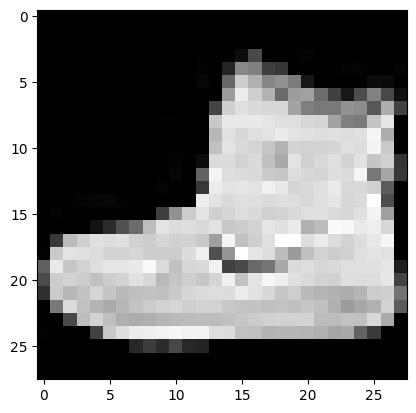

In [15]:
# 5. imshow() 함수로 샘플 이미지 확인하기
import matplotlib.pyplot as plt
plt.imshow(x_train_all[0], cmap = 'gray')
plt.show()

6. 타깃의 내용과 의미 확인하기


In [17]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


각 레이블의 의미는 무엇일까. 다음과 같다.

In [18]:
class_names = ['티셔츠/윗도리','바지','스웨터','드레스','코트',
               '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

이 class_names 리스트를 사용하면 y_train_all에 들어 있는 원소가 어떤 레이블을 의미하는지 숫자가 아닌 이름으로 알아볼 수 있다.

In [19]:
print(class_names[y_train_all[0]])

앵클부츠


In [21]:
import numpy as  np
# 7. 타깃 분포 확인하기
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [27]:
#8. 훈련 세트와 검증 세트 고르게 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify = y_train_all, test_size = 0.2, random_state = 42)

그런 다음 훈련, 검증 세트의 레이블이 잘 나누어졌는지 확인해보자.

In [28]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [29]:
np.bincount(y_val)

array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200])

In [30]:
# 9. 입력 데이터 정규화하기
x_train = x_train / 255
x_val = x_val / 255

In [31]:
# 10. 훈련 세트와 검증 세트의 차원 변경하기
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

### 타깃 데이터를 준비하고 다중 분류 신경망을 훈련

패션 MNIST 데이터 세트는 10개의 클래스로 구성되어 있다. 따라서 출력 뉴런의 개수도 10개가 되어야 한다. 하지만 y_train, y_val에 저장된 값들은 0 ~ 9 사이의 정숫값 하나로 10개의 출력 뉴런에 대응되지 않는다. 이 타깃 데이터 출력 뉴런의 개수에 맞게 변형해보자.

1. 타깃을 원-핫 인코딩으로 변환

타깃의 정수값에 해당하는 원소는 1, 나머지 원소는 모두 0 으로 하여 10개의 원소를 가진 배열을 만들자. 이러한 방법을 원 - 핫 인코딩(one - hot encoding) 이라고 한다. 1차원 정수 배열을 원 - 핫 인코딩하면 위와 같은 2차원 배열이 만들어진다.

2. 이제 과정 1에서 만든 배열의 각 원소를 뉴런의 출력값과 비교할 것이다.
3. to_categorical 함수 사용해 원 - 핫 인코딩하기
 텐서플로에는 원 - 핫 인코딩을 위한 to_categorical() 함수를 제공한다.

In [32]:
tf.keras.utils.to_categorical([0,1,3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

to_categorical() 함수는 세 번째 원소를 비우고 0, 1, 3에 대한 값을 잘 인코딩 하였다, 하지만 to_categorical() 함수는 문자열로 된 레이블은 인코딩하지 못한다.

In [34]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [35]:
print(y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


훈련 세트 레이블이 (48000,) 크기의 1차원 배열에서 (48000, 10) 크기의 2차원 배열로 바뀌어있다. 검증 세트 레이브로 (12000,)에서 (12000,10) 크기로 바뀌었다.

제대로 인코딩이 되었는지 첫 번째 레이블을 출력해보자.

In [36]:
print(y_train[0], y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


레이블이 6이 일곱 번째 원소 위치에 원 - 핫 인코딩 되었다.

In [37]:
# 4. MultiClassNetwork 클래스로 다중 분류 신경망 훈련
fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded,
       x_val = x_val, y_val = y_val_encoded, epochs = 40)

........................................

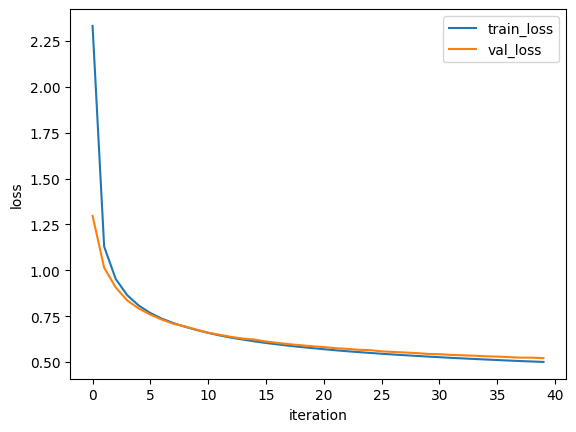

In [38]:
# 5. 훈련 손실, 검증 손실 그래프와 훈련 모델 점수 확인하기
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

손실 그래프가 초기에는 빠르게 감소하다가 완만하게 수렴하고 있따.

In [39]:
fc.score(x_val, y_val_encoded)

0.8150833333333334

점수....ㅠ

# 07 - 2 텐서플로와 케라스를 사용하여 신경망을 만든다.

###케라스에 대해 알아보자.

케라스는 딥러닝 패키지를 편리하게 사용하기 위해 만들어진 래퍼(Wrapper) 패키지이다.

**케라스를 사용하면 인공신경망의 층을 직관적으로 설계할 수 있다**



###Sequential 클래스의 사용 방법을 알아보자.

**Sequential 객체에 층을 추가**

Sequential 클래스로 객체를 생성할 때 Dense 클래스로 만든 층을 추가할 수 있다.


In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

 * add() 메서드 사용해 층을 추가



 ### Dense 클래스의 사용 방법

 * 뉴런의 개수를 지정하는 매개변수 unit
 * 활성화 함수를 지정하는 매개변수 activation


### 모델의 최적화 알고리즘과 손실 함수를 설정

**최적화 알고리즘을 지정하는 매개변수 optimizer**
**손실 함수를 지정하는 매개변수 loss**


###모델을 훈련하고 예측함

모델을 훈련하고 예측하는 메서드는 Sequential 클래스의 fit() 메서드와 predict() 메서드이다.

### 케라스로 다중 분류 신경망을 만들어보자.

1. 모델 생성하기.

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

2. 은닉층과 출력층을 모델에 추가하기

In [53]:
model.add(Dense(100, activation = 'sigmoid', input_shape =(784,)))
model.add(Dense(10, activation = 'softmax'))

3. 최적화 알고리즘과 손실 함수 지정하기

In [54]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

4. 모델 훈련하기

In [61]:
history = model.fit(x_train, y_train_encoded, epochs =40,
                   validation_data = (x_val, y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3848 - accuracy: 0.8635 - val_loss: 0.3865 - val_accuracy: 0.8633
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3833 - accuracy: 0.8640 - val_loss: 0.3816 - val_accuracy: 0.8653
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3815 - accuracy: 0.8646 - val_loss: 0.3805 - val_accuracy: 0.8652
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3800 - accuracy: 0.8664 - val_loss: 0.3792 - val_accuracy: 0.8661
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3785 - accuracy: 0.8660 - val_loss: 0.3786 - val_accuracy: 0.8672
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3770 - accuracy: 0.8670 - val_loss: 0.3766 - val_accuracy: 0.8673
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3754 - accuracy: 0.8674 - val_loss: 0.3777 - val_accuracy:

5. 손실과 정확도 그래프 그리기

history 객체의 history 딕셔너리에는 여러 측정 지표가 들어 있다.

In [62]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


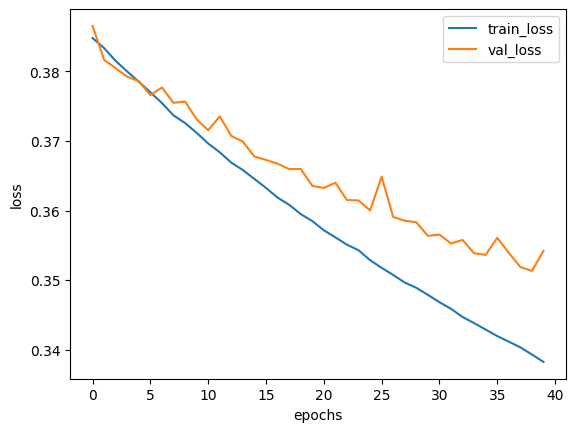

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'])
plt.show()

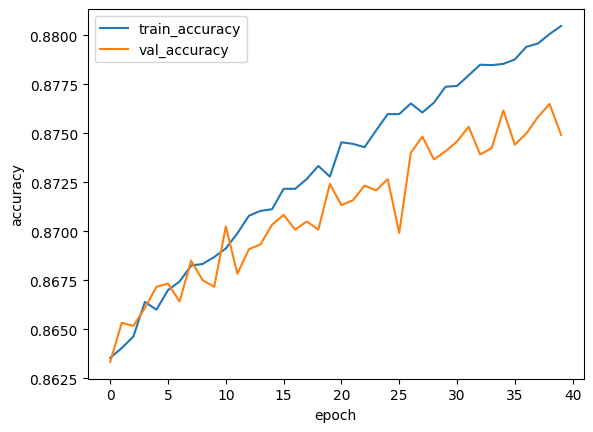

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

6. 검증 세트 정확도 계산하기

evaluate() 메서드를 사용하면 손실값과 metrics 매개변수에 추가한 측정 지표를 계산하여 반환.

In [66]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose = 0)
print(accuracy)

0.874916672706604
